## Question 1: Fixed effects and within transformations
You will find a modified version the imports-85.csv (imports85_modified.csv) file attached to this assignment. Again, make sure that all continuous variables of interest are numeric.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from linearmodels.panel import PanelOLS, FamaMacBeth
from patsy import dmatrices

os.chdir('/Users/yiyujie/Desktop/program/ML')
data = pd.read_csv('imports85_modified-1.csv',header = 0, sep = ',')

1. Regress fuel efficiency (city.mpg) on horsepower without fixed effects. What would you conclude based on that regression?

In [3]:
data.dropna(subset=['horsepower'],inplace=True)

model = smf.ols('Q("city.mpg") ~ horsepower', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("city.mpg")   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     10.25
Date:                Mon, 15 Apr 2024   Prob (F-statistic):            0.00159
Time:                        13:42:29   Log-Likelihood:                -689.24
No. Observations:                 203   AIC:                             1382.
Df Residuals:                     201   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2295      1.433      8.534      0.000       9.404      15.055
horsepower     0.0411      0.013      3.201      0.002       0.016       0.066
==============================================================================
Omnibus:                      159.253   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2717.537
Skew:                           2.800   Prob(JB):                         0.00
Kurtosis:                      20.027   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The relationship between horsepower and city.mpg is statistically significant, but the R-squared value is quite low, meaning that horsepower alone does not explain a large proportion of the variability in city.mpg.

2. Repeat the same regression but this time, add a fixed effect for number of cylinders being “two” or “four”. What would you conclude based on this new regression? What do you think drives the results in part 1?

In [4]:
data['is_24'] = 0
data.loc[data['num.of.cylinders'].isin(['two','four']),'is_24'] = 1
model = smf.ols('Q("city.mpg") ~ horsepower + is_24', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Q("city.mpg")   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     466.3
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           4.92e-76
Time:                        13:42:31   Log-Likelihood:                -518.28
No. Observations:                 203   AIC:                             1043.
Df Residuals:                     200   BIC:                             1053.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8952      1.235     35.542      0.000      41.460      46.331
horsepower    -0.1010      0.007    -13.765      0.000      -0.115      -0.086
is_24        -21.2495      0.717    -29.627      0.000     -22.664     -19.835
==============================================================================
Omnibus:                      261.365   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22114.869
Skew:                           5.258   Prob(JB):                         0.00
Kurtosis:                      53.040   Cond. No.                         706.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Adding the binary fixed effect for 'is_24' significantly changes the interpretation of the relationship between horsepower and city.mpg. This indicates that the number of cylinders is an important variable that affects fuel efficiency and should be controlled for in the model.
* The new regression suggests that the number of cylinders is an important factor driving the results seen in part 1. In the absence of controlling for the number of cylinders, it seemed like horsepower had a positive effect on fuel efficiency (city.mpg), which is counterintuitive. Once we control for the number of cylinders, we get a more realistic picture where horsepower has a negative impact on fuel efficiency, which is what we would generally expect.

3. (Within transformation) Now obtain the mean city.mpg and horsepower for each group. Use these group means to demean horsepower and city.mpg. Run the same regression you ran in part 1. Are the results different? Are the results obtained here different from the results in part 2? What does this tell you about the relation between fixed effect regressions and within transformations

In [5]:
group_means = data.groupby('is_24')[['city.mpg','horsepower']].mean()
data = data.join(group_means, on='is_24', rsuffix='_mean')

In [9]:
# longxia
data['groupmean_city_mpg'] = data.groupby('is_24')['city.mpg'].transform('mean')
data['groupmean_horsepower'] = data.groupby('is_24').horsepower.transform('mean')

In [10]:
data['city.mpg_demeaned'] = data['city.mpg'] - data['city.mpg_mean']
data['horsepower_demeaned'] = data['horsepower'] - data['horsepower_mean']
model_1 = smf.ols('Q("city.mpg_demeaned") ~ horsepower_demeaned', data=data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q("city.mpg_demeaned")   R-squared:                       0.487
Model:                                OLS   Adj. R-squared:                  0.484
Method:                     Least Squares   F-statistic:                     190.4
Date:                    Mon, 15 Apr 2024   Prob (F-statistic):           6.50e-31
Time:                            13:43:41   Log-Likelihood:                -518.28
No. Observations:                     203   AIC:                             1041.
Df Residuals:                         201   BIC:                             1047.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.204e-17      0.219  -2.37e-16      1.000      -0.432       0.432
horsepower_demeaned    -0.1010      0.007    -13.800      0.000      -0.115      -0.087
==============================================================================
Omnibus:                      261.365   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22114.869
Skew:                           5.258   Prob(JB):                         0.00
Kurtosis:                      53.040   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The coefficient for demeaned 'horsepower' is negative and significant, suggesting a negative relationship between horsepower and fuel efficiency within groups.
* The result is different from part 1. In part 1 (without fixed effects), the relationship between horsepower and fuel efficiency was positive, which was counterintuitive.
* The result is slightly different from part 2. The within transformation effectively removes the influence of all unobserved, time-invariant characteristics, allowing for a cleaner estimate of the impact of horsepower on fuel efficiency.

## Question 2: On marginal significance and trading strategy improvements
You come up with a signal of stock outperformance: log total asset growth. You realize that your professor has conveniently already coded up this variable for you in the dataset StockRetAcct_DT.csv. The variable is called "lnInv".
1. Using the Fama-MacBeth regression approach, what are the average return, standard deviation and Sharpe ratio of the trading strategy implied by using only an intercept and lnInv on the right hand side in the regressions?

In [6]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [12]:
data2 = pd.read_csv('StockRetAcct_DT.csv',header = 0, sep = ',').drop('Unnamed: 0', axis=1)
data2['ExRet'] = np.exp(data2.lnAnnRet) - np.exp(data2.lnRf)
def ols_coef(x,formula): 
    return smf.ols(formula,data=x).fit().params
data2['neg_lnInv'] = -data2['lnInv']
data2 = data2.dropna(subset=['neg_lnInv', 'ExRet'])
res = data2.groupby('year').apply(ols_coef,'ExRet ~ 1 + neg_lnInv')
print('Mean Return: ' , str(res['neg_lnInv'].mean())+'\n', 
      'Std Dev:      ', str(res['neg_lnInv'].std())+'\n', 
      'Sharpe Ratio ' , str(res['neg_lnInv'].mean()/ res['neg_lnInv'].std())+'\n', 
      't-stat:      ' , str(35**.5*(res['neg_lnInv'].mean())/ res['neg_lnInv'].std()), sep="\n")

Mean Return: 
0.08679146319781363

Std Dev:      
0.14864410759416122

Sharpe Ratio 
0.5838876804641183

t-stat:      
3.4543261019946985


/var/folders/l_/m6g3497s5j77bqb9jr7506tc0000gn/T/ipykernel_18755/311495048.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res = data2.groupby('year').apply(ols_coef,'ExRet ~ 1 + neg_lnInv')


2. What is the analytical expression for the portfolio weights in this case? (I'm looking for a formula)

$$\begin{align*}
w_{i,t-1}=\frac{1}{N}\frac{lnInv_{i,t-1}-E_N[lnInv_{i,t-1}]}{Var_N[lnInv_{i,t-1}]}
\end{align*}$$

3. You worry that there is industry-related noise associated with the characteristic lnInv and want to clean up your trading strategy with the goal of reducing exposure to unpriced industry risks. What regressions to you run? Report mean, standard deviation, and Sharpe ratio of the 'cleaned-up' trading strategy.

In [13]:
data2.dropna(subset=['ExRet', 'neg_lnInv', 'ff_ind'], inplace = True)
res = (data2.groupby('year').apply(ols_coef, 'ExRet ~ 1 + neg_lnInv + C(ff_ind)'))
print('Mean Return: ' , str(res['neg_lnInv'].mean())+'\n', 
      'Std Dev:      ', str(res['neg_lnInv'].std())+'\n', 
      'Sharpe Ratio ' , str(res['neg_lnInv'].mean()/ res['neg_lnInv'].std())+'\n', 
      't-stat:      ' , str(35**.5*(res['neg_lnInv'].mean())/ res['neg_lnInv'].std()), sep="\n")

Mean Return: 
0.08257761689795615

Std Dev:      
0.10196423000688849

Sharpe Ratio 
0.8098684891003185

t-stat:      
4.791246595335826


/var/folders/l_/m6g3497s5j77bqb9jr7506tc0000gn/T/ipykernel_18755/2841309710.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res = (data2.groupby('year').apply(ols_coef, 'ExRet ~ 1 + neg_lnInv + C(ff_ind)'))


4. As in the class notes, plot the cumulative returns to the simple and the 'cleaned-up' trading strategies based on your new signal, lnInv. Make sure both trading strategies result in portfolios with a 15% return standard deviation.

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yiyujie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Cumulative Return'),
 Text(0.5, 1.0, 'cumulative returns to trading strategies based on lnInv')]

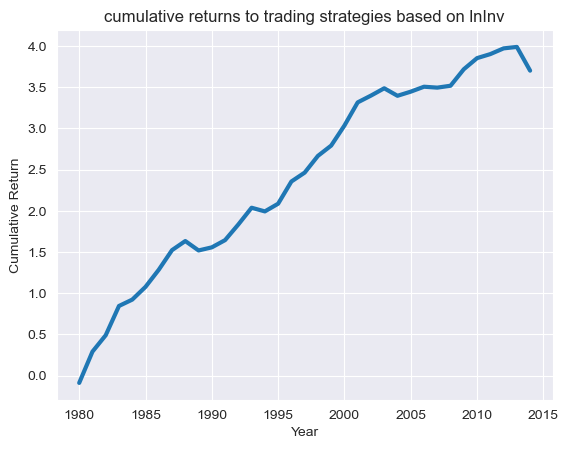

In [14]:
lnInv_stdev = res['neg_lnInv'].std() 
lnInv_ret = res['neg_lnInv']

# for plotting, get the scaled excess portfolio returns 
lnInv_ret = lnInv_ret * 0.15 / lnInv_stdev 

# create cumulative log return series 
cum_ret_lnInv = pd.DataFrame.cumsum(np.log(1+lnInv_ret)) 

# Plot
sns.set_style('darkgrid') 
plt.figure() 
ax = sns.lineplot(data = cum_ret_lnInv,dashes = False,linewidth = 3) 
ax.set(xlabel = 'Year', 
       ylabel = 'Cumulative Return', 
       title  = "cumulative returns to trading strategies based on lnInv")


## Question 3: Predicting medium to long‐run firm‐level return variance
There are many return volatility models, such as GARCH. These work best at shorter horizons. As an alternative, we will explore a panel regression approach to predicting firm-level return variance. The data set StockRetAcct_DT.csv has annual realized variance (rv), calculated as the sum of squared daily returns to each firm, each year. Run panel forecasting regressions to forecast firm-level one-year ahead rv along the lines of what we did with lnROE in class.
1. Try with and without industry and year fixed effects, with and without clustering of standard errors. Discuss which specification makes most sense to you. In particular, discuss the effect of a year fixed effect. What is the intuition for the impact of this fixed effect?

In [10]:
from linearmodels.panel import PanelOLS
data2.sort_values(['FirmID','year'], ascending=[True, True], inplace=True)
data2['lead_rv'] = data2.groupby('FirmID')['rv'].shift(-1)
data2 = data2[~data2.ff_ind.isna()]
data2 = data2.set_index(['FirmID','year'])

In [11]:
rv_panel = PanelOLS.from_formula(formula='lead_rv ~ 1 + rv', data = data2).fit()
print(rv_panel)

                          PanelOLS Estimation Summary                           
Dep. Variable:                lead_rv   R-squared:                        0.2572
Estimator:                   PanelOLS   R-squared (Between):              0.5115
No. Observations:               55142   R-squared (Within):               0.0016
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.2572
Time:                        14:46:40   Log-likelihood                 2.582e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.909e+04
Entities:                        6001   P-value                           0.0000
Avg Obs:                       9.1888   Distribution:                 F(1,55140)
Min Obs:                       1.0000                                           
Max Obs:                       34.000   F-statistic (robust):          1.909e+04
                            

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [12]:
rv_panel2 = PanelOLS.from_formula(formula='lead_rv ~ 1 + rv', 
                                   data = data2).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=False)
print(rv_panel2)

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:                lead_rv   R-squared:                        0.2572
Estimator:                   PanelOLS   R-squared (Between):              0.5115
No. Observations:               55142   R-squared (Within):               0.0016
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.2572
Time:                        14:46:40   Log-likelihood                 2.582e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.909e+04
Entities:                        6001   P-value                           0.0000
Avg Obs:                       9.1888   Distribution:                 F(1,55140)
Min Obs:                       1.0000                                           
Max Obs:                       34.000   F-statistic (robust):             4221.7
                            

In [13]:
rv_panel3 = PanelOLS.from_formula(formula='lead_rv ~ 1 + rv', 
                                   data = data2).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=True)
print(rv_panel3)

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:                lead_rv   R-squared:                        0.2572
Estimator:                   PanelOLS   R-squared (Between):              0.5115
No. Observations:               55142   R-squared (Within):               0.0016
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.2572
Time:                        14:46:40   Log-likelihood                 2.582e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.909e+04
Entities:                        6001   P-value                           0.0000
Avg Obs:                       9.1888   Distribution:                 F(1,55140)
Min Obs:                       1.0000                                           
Max Obs:                       34.000   F-statistic (robust):             8.2885
                            

In [14]:
rv_panel4 = PanelOLS.from_formula(formula='lead_rv ~ 1 + rv + C(ff_ind)', 
                                   data = data2).fit(cov_type = 'clustered', cluster_entity=False, cluster_time=True)
print(rv_panel4)

                          PanelOLS Estimation Summary                           
Dep. Variable:                lead_rv   R-squared:                        0.2782
Estimator:                   PanelOLS   R-squared (Between):              0.5325
No. Observations:               55142   R-squared (Within):               0.0205
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.2782
Time:                        14:46:41   Log-likelihood                 2.661e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1770.9
Entities:                        6001   P-value                           0.0000
Avg Obs:                       9.1888   Distribution:                F(12,55129)
Min Obs:                       1.0000                                           
Max Obs:                       34.000   F-statistic (robust):             39.443
                            

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [15]:
rv_panel5 = PanelOLS.from_formula(formula= 'lead_rv ~ 1 + rv + C(ff_ind) + TimeEffects', 
                data = data2).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=True)
print(rv_panel5)

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:                lead_rv   R-squared:                        0.3908
Estimator:                   PanelOLS   R-squared (Between):              0.5819
No. Observations:               55142   R-squared (Within):              -0.0398
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.2657
Time:                        14:46:41   Log-likelihood                 4.427e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2945.1
Entities:                        6001   P-value                           0.0000
Avg Obs:                       9.1888   Distribution:                F(12,55096)
Min Obs:                       1.0000                                           
Max Obs:                       34.000   F-statistic (robust):             46.070
                            

In [ ]:
print(compare({'1':reg1,'2':reg2,'3':reg3,'4':reg4}))

* The last one make more sense which we consider the time effect and the industry FE 

2. Also try forecasting at the 5-year horizon (rv in 5 years). How do the results change? Can we predict return variance 5-years ahead? Is the 5-year lagged rv significant, or are other variables more important?

* The 5-year lagged rv is not significant.

In [16]:
data2['lead_rv5'] = data2.groupby('FirmID')['rv'].shift(-5)
rv5_panel = PanelOLS.from_formula(formula='lead_rv5 ~ 1 + rv', data = data2).fit()
print(rv5_panel)

                          PanelOLS Estimation Summary                           
Dep. Variable:               lead_rv5   R-squared:                        0.0058
Estimator:                   PanelOLS   R-squared (Between):              0.0238
No. Observations:               35796   R-squared (Within):              -0.0323
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.0058
Time:                        14:46:41   Log-likelihood                 1.537e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      209.31
Entities:                        3537   P-value                           0.0000
Avg Obs:                       10.120   Distribution:                 F(1,35794)
Min Obs:                       1.0000                                           
Max Obs:                       30.000   F-statistic (robust):             209.31
                            

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [17]:
rv5_panel2 = PanelOLS.from_formula(formula='lead_rv5 ~ 1 + rv', 
                                   data = data2).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=False)
print(rv5_panel2)

                          PanelOLS Estimation Summary                           
Dep. Variable:               lead_rv5   R-squared:                        0.0058
Estimator:                   PanelOLS   R-squared (Between):              0.0238
No. Observations:               35796   R-squared (Within):              -0.0323
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.0058
Time:                        14:46:41   Log-likelihood                 1.537e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      209.31
Entities:                        3537   P-value                           0.0000
Avg Obs:                       10.120   Distribution:                 F(1,35794)
Min Obs:                       1.0000                                           
Max Obs:                       30.000   F-statistic (robust):             127.12
                            

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [18]:
rv5_panel3 = PanelOLS.from_formula(formula='lead_rv5 ~ 1 + rv', 
                                   data = data2).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=True)
print(rv5_panel3)

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               lead_rv5   R-squared:                        0.0058
Estimator:                   PanelOLS   R-squared (Between):              0.0238
No. Observations:               35796   R-squared (Within):              -0.0323
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.0058
Time:                        14:46:41   Log-likelihood                 1.537e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      209.31
Entities:                        3537   P-value                           0.0000
Avg Obs:                       10.120   Distribution:                 F(1,35794)
Min Obs:                       1.0000                                           
Max Obs:                       30.000   F-statistic (robust):             0.9549
                            

In [19]:
rv5_panel4 = PanelOLS.from_formula(formula='lead_rv5 ~ 1 + rv + C(ff_ind)', 
                                   data = data2).fit(cov_type = 'clustered', cluster_entity=False, cluster_time=True)
print(rv5_panel4)

                          PanelOLS Estimation Summary                           
Dep. Variable:               lead_rv5   R-squared:                        0.0603
Estimator:                   PanelOLS   R-squared (Between):              0.0996
No. Observations:               35796   R-squared (Within):              -0.0026
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.0603
Time:                        14:46:42   Log-likelihood                 1.638e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      191.45
Entities:                        3537   P-value                           0.0000
Avg Obs:                       10.120   Distribution:                F(12,35783)
Min Obs:                       1.0000                                           
Max Obs:                       30.000   F-statistic (robust):             85.421
                            

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [20]:
rv5_panel5 = PanelOLS.from_formula(formula= 'lead_rv5 ~ 1 + rv + C(ff_ind) + TimeEffects', 
                data = data2).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=True)
print(rv5_panel5)

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               lead_rv5   R-squared:                        0.1184
Estimator:                   PanelOLS   R-squared (Between):              0.1231
No. Observations:               35796   R-squared (Within):              -0.1226
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.0160
Time:                        14:46:42   Log-likelihood                 2.463e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      400.05
Entities:                        3537   P-value                           0.0000
Avg Obs:                       10.120   Distribution:                F(12,35754)
Min Obs:                       1.0000                                           
Max Obs:                       30.000   F-statistic (robust):             20.922
                            

In [21]:
rv5_panel6 = PanelOLS.from_formula(formula='lead_rv5 ~ 1 + rv + lnBM + lnProf + lnLever + lnIssue + lnInv + C(ff_ind)', 
                data = data2).fit(cov_type = 'clustered', cluster_entity=True, cluster_time=True)
print(rv5_panel6)

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:               lead_rv5   R-squared:                        0.0905
Estimator:                   PanelOLS   R-squared (Between):              0.2075
No. Observations:               34092   R-squared (Within):               0.0086
Date:                Sun, Apr 14 2024   R-squared (Overall):              0.0905
Time:                        14:46:42   Log-likelihood                 1.657e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      199.52
Entities:                        3335   P-value                           0.0000
Avg Obs:                       10.222   Distribution:                F(17,34074)
Min Obs:                       1.0000                                           
Max Obs:                       30.000   F-statistic (robust):             17.774
                            

3. What are the benefits of the panel approach, versus simply running one regression for each firm? What are the potential costs?

The primary issue with running a regression for each firm, is that the time-series for each firm is not long enough to get statistically significant estimates. The panel approach allows you to estimate covariates across many firms, allowing for more observations to be used in the regression. However, the panel specification will identify the aggregate affect of the covariates, which may not be directly applicable to any specific fi